In [3]:
import pandas as pd
import numpy as np
import datetime
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
import warnings
import math as ma
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_excel("KPMG_data.xlsx")
df.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,060 Morning Avenue,2016.0,New South Wales,Australia,10.0,NaN,NaN
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,6 Meadow Vale Court,2153.0,New South Wales,Australia,10.0,NaN,NaN
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,No,7.0,0 Holy Cross Court,4211.0,QLD,Australia,9.0,NaN,NaN
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,Yes,8.0,17979 Del Mar Point,2448.0,New South Wales,Australia,4.0,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          5000 non-null   int64         
 1   first_name                           5000 non-null   object        
 2   last_name                            4846 non-null   object        
 3   gender                               5000 non-null   object        
 4   past_3_years_bike_related_purchases  5000 non-null   int64         
 5   DOB                                  4896 non-null   datetime64[ns]
 6   job_title                            4388 non-null   object        
 7   job_industry_category                4179 non-null   object        
 8   wealth_segment                       5000 non-null   object        
 9   deceased_indicator                   5000 non-null   object        
 10  owns_car    

In [6]:
# To calculate age, we need to use datetime from DOB column
from datetime import date

In [7]:
df['DOB'] = pd.to_datetime(df['DOB'])

In [8]:
today = date.today()
df['Age'] = (pd.Timestamp(today) - df['DOB']).astype('<m8[Y]')
df.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value,Age
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,060 Morning Avenue,2016.0,New South Wales,Australia,10.0,NaN,NaN,69.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,6 Meadow Vale Court,2153.0,New South Wales,Australia,10.0,NaN,NaN,42.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,No,7.0,0 Holy Cross Court,4211.0,QLD,Australia,9.0,NaN,NaN,61.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,Yes,8.0,17979 Del Mar Point,2448.0,New South Wales,Australia,4.0,NaN,NaN,45.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          5000 non-null   int64         
 1   first_name                           5000 non-null   object        
 2   last_name                            4846 non-null   object        
 3   gender                               5000 non-null   object        
 4   past_3_years_bike_related_purchases  5000 non-null   int64         
 5   DOB                                  4896 non-null   datetime64[ns]
 6   job_title                            4388 non-null   object        
 7   job_industry_category                4179 non-null   object        
 8   wealth_segment                       5000 non-null   object        
 9   deceased_indicator                   5000 non-null   object        
 10  owns_car    

In [45]:
df['Age'] = df['Age'].astype(int)

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

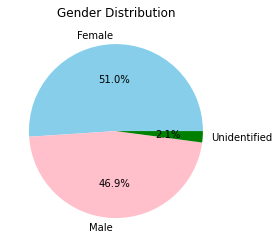

In [14]:
# group by Gender and get count
gender_counts = df.groupby('gender').size()

# create pie chart
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['skyblue', 'pink','green'])

# set title
plt.title('Gender Distribution')

# display plot
plt.show()

In [29]:
df.to_excel('KPMG_data_final.xlsx', index=False)

[2552, 2343, 105]


([<matplotlib.axis.XTick at 0x230f13cb850>,
 [Text(0, 0, 'Female'),
  Text(1, 0, "F's P"),
  Text(2, 0, 'Male'),
  Text(3, 0, "M's P"),
  Text(4, 0, 'Unknown'),
  Text(5, 0, "U's P")])

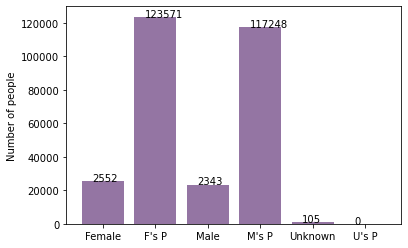

In [19]:
gender = [0,0,0] #first is Female, second if Male, third is Unknown
for each in df['gender']:
    if each[0] == "F":
        gender[0] += 1
    elif each[0] == "M":
        gender[1] += 1
    else:
        gender[2] += 1

print(gender)
def gf(x, pos):
    #'The two args are the value and gender'
    return int(x)
bike = [0,0,0]
bike[0] += df['past_3_years_bike_related_purchases'][df['gender'] == 'Female'].sum() + df['past_3_years_bike_related_purchases'][df['gender'] == 'F'].sum()
bike[1] += df['past_3_years_bike_related_purchases'][df['gender'] == 'Male'].sum() + df['past_3_years_bike_related_purchases'][df['gender'] == 'M'].sum()
bike[2] += df['past_3_years_bike_related_purchases'][df['gender'] == 'U'].sum()

grapho = [gender[0], bike[0], gender[1], bike[1], gender[2], bike[2]]
graphl = [gender[0]*10, bike[0], gender[1]*10, bike[1], gender[2]*10, bike[2]]
colorr = (0.3,0.1,0.4,0.6)
#scale up gender by 10 for easier visualization
formatter = FuncFormatter(gf)
x = np.arange(6)
fig, ax = plt.subplots()
ax.set_ylabel('Number of people')
ax.yaxis.set_major_formatter(formatter)
plt.bar(x, graphl, color = colorr)
for i in range(len(gender*2)):
    plt.text(x = i-0.2, y = graphl[i]+0.1, s = grapho[i], size = 10)

plt.xticks(x, ('Female', "F's P", 'Male', "M's P", 'Unknown', "U's P"))

([<matplotlib.axis.XTick at 0x230f145caf0>,
 [Text(0, 0, 'Female'), Text(1, 0, 'Male'), Text(2, 0, 'Unknown')])

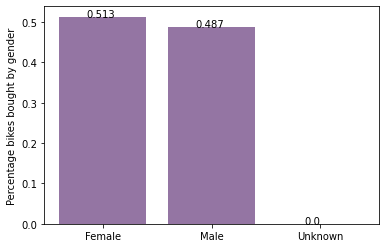

In [20]:
avg  = [0,0,0]
ss   = sum(bike)
for i in range(len(avg)):
    avg[i] += round(bike[i]/ss,3) 

x1 = np.arange(3)
fig1, ax1 = plt.subplots()
ax1.set_ylabel('Percentage bikes bought by gender')
plt.bar(x1, avg, color = colorr)
for i in range(len(avg)):
    plt.text(x = i-0.15, y = avg[i], s = avg[i], size = 10)

plt.xticks(x1, ('Female', 'Male', 'Unknown'))

In [22]:
df.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value,Age
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,060 Morning Avenue,2016.0,New South Wales,Australia,10.0,NaN,NaN,69.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,6 Meadow Vale Court,2153.0,New South Wales,Australia,10.0,NaN,NaN,42.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,No,7.0,0 Holy Cross Court,4211.0,QLD,Australia,9.0,NaN,NaN,61.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,Yes,8.0,17979 Del Mar Point,2448.0,New South Wales,Australia,4.0,NaN,NaN,45.0


In [23]:
#check_unique()["Category"]
df["job_industry_category"].value_counts()

Manufacturing         998
Financial Services    977
Health                754
Retail                436
Property              331
IT                    274
Entertainment         173
Argiculture           139
Telecommunications     97
Name: job_industry_category, dtype: int64

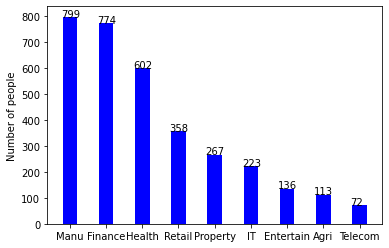

In [25]:
val = [799, 774, 602, 358, 267, 223, 136, 113, 72]
colors = ['blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue']

x = np.arange(len(val))
fig, ax = plt.subplots()
ax.set_ylabel('Number of people')
plt.bar(x, val, color=colors, width=0.4)

for i in range(len(val)):
    plt.text(x=i-0.25, y=val[i]+0.1, s=val[i], size=10)

plt.xticks(x, ("Manu", "Finance", "Health", "Retail", "Property", "IT", "Entertain", "Agri", "Telecom"))
plt.show()

In [28]:
#check_unique()["wealth_segment"]
df["wealth_segment"].value_counts()

Mass Customer        2508
High Net Worth       1272
Affluent Customer    1220
Name: wealth_segment, dtype: int64

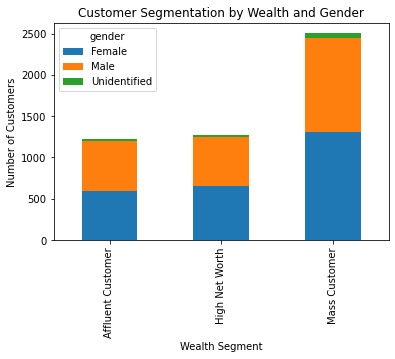

In [30]:
# Group data by wealth segment and count the number of customers in each category
wealth_counts = df.groupby('wealth_segment')['customer_id'].count()

# Group data by wealth segment and gender, and count the number of customers in each category
wealth_gender_counts = df.groupby(['wealth_segment', 'gender'])['customer_id'].count()

# Reshape the data into a stacked bar chart format
wealth_gender_counts = wealth_gender_counts.unstack(level=1)

# Plot the stacked bar chart
wealth_gender_counts.plot(kind='bar', stacked=True)

# Add labels and title
plt.xlabel('Wealth Segment')
plt.ylabel('Number of Customers')
plt.title('Customer Segmentation by Wealth and Gender')

# Show the plot
plt.show()

In [38]:
# Create the birth_year column
df['birth_year'] = df['DOB'].apply(lambda x: pd.Timestamp(x).year)

In [40]:
# Extract year from DOB column using dt accessor
df['Year'] = df['DOB'].dt.year

# Define the generational ranges
generations = {
    'Gen Z': (2010, 2022),
    'Millennial': (1981, 2009),
    'Gen X': (1965, 1980),
    'Baby Boomer': (1946, 1964)
}

# Categorize each employee by generation based on their birth year
df['Generation'] = df['Year'].apply(lambda x: next((k for k, v in generations.items() if v[0] <= x <= v[1]), None))

# Print the updated DataFrame
print(df)

      customer_id      first_name  last_name  gender  \
0               1         Laraine  Medendorp  Female   
1               2             Eli    Bockman    Male   
2               3           Arlin     Dearle    Male   
3               4          Talbot        NaN    Male   
4               5  Sheila-kathryn     Calton  Female   
...           ...             ...        ...     ...   
4995         4996       Ferdinand  Romanetti    Male   
4996         4997            Burk    Wortley    Male   
4997         4998        Melloney      Temby  Female   
4998         4999          Dickie    Cubbini    Male   
4999         5000           Sylas    Duffill    Male   

      past_3_years_bike_related_purchases        DOB  \
0                                      93 1953-10-12   
1                                      81 1980-12-16   
2                                      61 1954-01-20   
3                                      33 1961-10-03   
4                                      56 1977-

In [42]:
df.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,...,postcode,state,country,property_valuation,Rank,Value,Age,birth_year,Year,Generation
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,2016.0,New South Wales,Australia,10.0,NaN,NaN,69.0,1953.0,1953.0,Baby Boomer
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,...,2153.0,New South Wales,Australia,10.0,NaN,NaN,42.0,1980.0,1980.0,Gen X
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,...,NaN,NaN,NaN,NaN,NaN,NaN,69.0,1954.0,1954.0,Baby Boomer
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,...,4211.0,QLD,Australia,9.0,NaN,NaN,61.0,1961.0,1961.0,Baby Boomer
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,...,2448.0,New South Wales,Australia,4.0,NaN,NaN,45.0,1977.0,1977.0,Gen X


In [43]:
df.to_excel('KPMG_dataset.xlsx', index=False)